In [3]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import subprocess
import os

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters


% matplotlib inline

In [4]:
dataDrive = "/Volumes/DataCenter/"
dataLocation = "neosimData/ldm156/fullsky5year.db"
subsampleLocation = "neosimData/ldm156_subsample_small/"
runLocation = dataDrive + subsampleLocation + "subsampleRun/"

In [5]:
con = sql.connect(dataDrive + dataLocation)

In [6]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 10000
""", con)

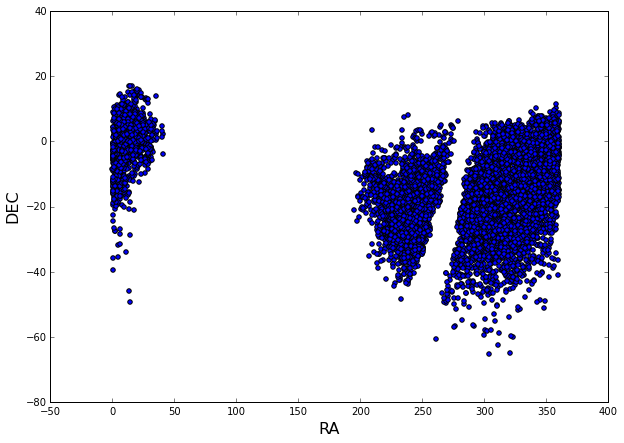

In [7]:
MopsPlotter.plotDataframe(full)

In [8]:
mjd = [51029,51065]
ra = [300,302]
dec = [-20,-18]
nights = mjd[1]-mjd[0]

In [9]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [10]:
len(ssmids['ssmid'])

6017

In [11]:
obj_num = 100

In [12]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [13]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [14]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
139832,88649597,1365754,304.298404,-16.939759,51029.253985,20.975096,6.916582
139855,88649597,1627937,302.656587,-18.902384,51029.253985,19.395367,29.633509
140634,88649601,1365754,304.298310,-16.939784,51029.254432,20.975111,6.684759
140676,88649601,1796167,306.042496,-18.397239,51029.254432,20.721616,8.442741
140711,88649601,2077397,305.551403,-17.497129,51029.254432,20.287379,12.594427
140808,88649601,3398794,306.612975,-16.483464,51029.254432,20.715157,8.493117
140917,88649601,4604380,306.063717,-18.506624,51029.254432,20.423211,11.113364
141023,88649601,5832554,305.651206,-16.505245,51029.254432,21.019463,6.417187
141083,88649601,6371418,307.012446,-17.207666,51029.254432,21.196152,5.453423


In [18]:
subsampleData = dataDrive + subsampleLocation + "subsampledata.txt"

In [19]:
objs.to_csv(subsampleData, sep=" ", header=False, index='diaid')

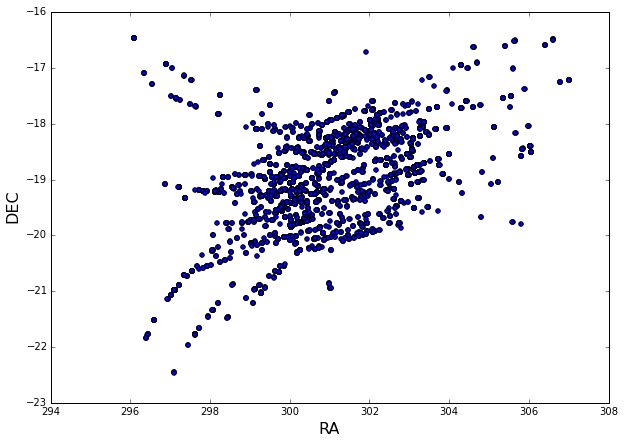

In [20]:
MopsPlotter.plotDataframe(objs)

In [21]:
nightly = dataDrive + subsampleLocation + "nightly/"

! rm -rf {nightly}
! mkdir {nightly}

In [22]:
call = ["python", os.getenv("MOPS_DIR") + "/bin/splitByNight.py", "-n", nightly, subsampleData]
subprocess.call(call);

In [23]:
parameters = MopsParameters()
tracker = MopsTracker(runLocation)
tracker.getDetections(nightly)

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets (tracklets) ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	Detection error threshold:                0.0004
	Maximum right ascension acceleration:     0.02
	Maximum declination acceleration: 

In [24]:
parameters, tracker = runMops.runMops(parameters, tracker, overwrite=True)

------- Run MOPS -------
Running LSST's Moving Object Pipeline

Overwrite triggered: clearing tracker...

Found 17 detection files in /Volumes/DataCenter/neosimData/ldm156_subsample_small/nightly/.

Saving parameters to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/parameters.yaml

------- Run MOPS -------
Running findTracklets...
Completed running findTracklets.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/tracker.yaml

------- Run MOPS -------
Running idsToIndices.py...
Completed running idsToIndices.py.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/tracker.yaml

------- Run MOPS -------
Running collapseTracklets...
Completed running collapseTracklets.

------- Run MOPS -------
Running indicesToIds.py...
Completed running indicesToIds.py.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/tracker.yaml

------- Run MOPS -------
Running purifyTracklet

In [25]:
parameters = MopsParameters.fromYaml(runLocation + "parameters.yaml")
tracker = MopsTracker.fromYaml(runLocation + "tracker.yaml")

Loading parameters from /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/parameters.yaml
Loading tracker from /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/tracker.yaml


In [26]:
results = MopsAnalysis.analyze(parameters, tracker, fullDetFile=subsampleData, overwrite=True)

Initializing new results object...
Creating DiaSources table...
Creating AllObjects table...
Creating FoundObjects view...
Creating MissedObjects view...
Creating AllTracklets table...
Creating TrackletMembers table...
Creating Tracklets view...
Creating CollapsedTracklets view...
Creating PurifiedTracklets view...
Creating FinalTracklets view...

Reading full detections file into dataframe...
Counting findable objects as tracklets...
Counting findable objects as tracks...
Building objects dataframe...
Updating objects dataframe...
Reading full detections file into database...
Starting tracklet analysis for night 51029 at Thu Mar 17 08:48:05 2016
- Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/results/51029.results
- Checking file sizes...
- Reading input detections...
- Counting findable objects...
- Updating results object...
Saving results to /Volumes/DataCenter/neosimData/ldm156_subsample_small/subsampleRun/results/results.yaml
- Writing dete